In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import pickle
import itertools
import gc
import math
import matplotlib.pyplot as plt
import dateutil.easter as easter
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter
from datetime import datetime, date, timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, Lasso

In [2]:
test = pd.read_csv('C:\\Users\\user\\kaggle_playground\\data\\test.csv')
submission = pd.read_csv('C:\\Users\\user\\kaggle_playground\\data\\sample_submission.csv')




In [ ]:
# kaggle competition  - kaggle playground 20222
# https://www.kaggle.com/c/kaggle-playground-20222
# https://www.kaggle.com/c/kaggle-playground-20222/discussion/118862


C:\Users\user\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_sold', ylabel='Density'>

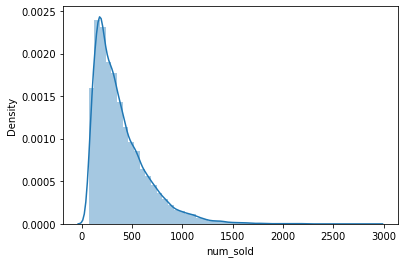

In [4]:
# ananlysis the target wit seaborn num_sold
sns.distplot(train['num_sold'])


In [2]:
import os
for dirname, _, filenames in os.walk('C:\\Users\\user\\kaggle_playground\\data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\user\kaggle_playground\data\GDP_data_2015_to_2019_Finland_Norway_Sweden.csv
C:\Users\user\kaggle_playground\data\sample_submission.csv
C:\Users\user\kaggle_playground\data\submissionxbr.csv
C:\Users\user\kaggle_playground\data\test.csv
C:\Users\user\kaggle_playground\data\train.csv


In [6]:
train = pd.read_csv("./data/train.csv")
test = pd.read_csv("./data/test.csv")
submission = pd.read_csv("./data/sample_submission.csv")

In [7]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [4]:
df  = pd.read_csv("C:\\Users\\user\\kaggle_playground\src\\train_folds.csv")

In [10]:
test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [24]:
train = pd.read_csv('./data/train.csv')
TARGET = 'num_sold'
FEATURES = train.columns.difference([TARGET,'date'])

In [22]:
# preprocess the categorical data label encoding
for feature in ['country', 'store', 'product']:
    le = LabelEncoder()
    train[feature] = le.fit_transform(train[feature])
    
train['date'] = pd.to_datetime(train['date'])
train.head(3)

    





,row_id,date,country,store,product,num_sold
0,0,2015-01-01,0,0,1,329
1,1,2015-01-01,0,0,0,520
2,2,2015-01-01,0,0,2,146


In [17]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
N_splits = 2
kf = KFold(n_splits=N_splits)
#import optuna 

def objective(trial):
   
    params = {
            'tree_method': 'hist',
            'grow_policy' : trial.suggest_categorical ('grow_policy', ['lossguide','depthwise']),
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.01, 0.2),
            'max_depth': trial.suggest_int('max_depth', 3, 20),# a virer avec'depthwise'
            'reg_alpha': trial.suggest_loguniform('reg_alpha', 1, 10),
            'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-15, 10.0),
            'max_delta_step':trial.suggest_int('max_delta_step', 1, 10),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
            'colsample_bytree':trial.suggest_loguniform('colsample_bytree', 0.4, 1.0),
            'subsample': trial.suggest_loguniform('subsample', 0.4, 1.0),
            'seed':1
                }
    if params['grow_policy'] == 'lossguide':
        params['max_leaves'] = trial.suggest_int('max_leaves', 1, 100)   
        
        
    score_list = []
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(train, train[TARGET])):
        X_tr = train.loc[train_idx][FEATURES]
        X_va = train.iloc[val_idx][FEATURES]
        
        # Preprocess the data
        X_tr_f = X_tr # Use the correct preprocessing if required (normalization...)
        y_tr = train[TARGET].loc[train_idx].values
        data_tr = xgb.DMatrix(X_tr_f, label=y_tr)

        X_va_f = X_va # Use the correct preprocessing if required (normalization...)
        y_va = train[TARGET].loc[val_idx].values
        data_va = xgb.DMatrix(X_va_f, label=y_va)
        evallist = [(data_va, 'eval'), (data_tr, 'train')]

        # Train the model
        model = xgb.train(params, 
                          data_tr,
                          num_boost_round=2000,
                          evals = evallist,
                          verbose_eval=0,
                          early_stopping_rounds = 200)

        # Predictions
        y_va_pred = model.predict(data_va)
        score = mean_squared_error(y_va, y_va_pred,squared = True)
        score_list.append(score)
        
    return sum(score_list) / len(score_list)

In [10]:
pred = np.column_stack(final_preds).mean(axis=1)
submission['num_sold'] = pred




In [11]:
submission.to_csv('C:\\Users\\user\\kaggle_playground\\data\\submissionxbr.csv', index=False)

In [12]:
import optuna

ModuleNotFoundError: No module named 'optuna'